In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [5]:
data = pd.read_csv('./data/super-bowl@public.csv', delimiter=';')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              54 non-null     object
 1   SB                54 non-null     object
 2   Attendance        54 non-null     int64 
 3   Winner            54 non-null     object
 4   QB  Winner        54 non-null     object
 5   Coach Winner      54 non-null     object
 6   Winning Pts       54 non-null     int64 
 7   Loser             54 non-null     object
 8   QB Loser          54 non-null     object
 9   Coach Loser       54 non-null     object
 10  Losing Pts        54 non-null     int64 
 11  MVP               54 non-null     object
 12  Stadium           54 non-null     object
 13  City              54 non-null     object
 14  State             54 non-null     object
 15  Point Difference  54 non-null     int64 
 16  Referee           50 non-null     object
 17  Umpire            

In [7]:
data.head()

,Date,SB,Attendance,Winner,QB Winner,Coach Winner,Winning Pts,Loser,QB Loser,Coach Loser,...,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge,Geo Shape,Geo Point 2D
0,1981-01-25,XV,76135,Oakland Raiders,Jim Plunkett,Tom Flores,27,Philadelphia Eagles,Ron Jaworski,Dick Vermeil,...,17,Ben Dreith,Frank Sinkovitz,Tony Veteri,Tom Dooley,Fritz Graf,Tom Kelleher,Dean Look,"{""coordinates"": [[[-89.21767, 29.29108], [-89....","31.0480777894, -91.9572061819"
1,2003-01-26,XXXVII,67603,Tampa Bay Buccaneers,Brad Johnson,Jon Gruden,48,Oakland Raiders,Rich Gannon,Bill Callahan,...,27,Bill Carollo,Ed Coukart,Dale Williams,Mark Steinkerchner,Tom Sifferman,Don Carey,Rick Patterson,"{""coordinates"": [[[-114.3549006824, 34.4646666...","37.2551445335, -119.640543961"
2,2015-02-01,XLIX,70288,New England Patriots,Tom Brady,Bill Belichick,28,Seattle Seahawks,Russell Wilson,Pete Carroll,...,4,Bill Vinovich,Bill Schuster,Dana McKenzie,Mark Perlman,Bob Waggoner,Terrence Miles,Tom Hill,"{""coordinates"": [[[-109.0452247791, 36.9999124...","34.2955950831, -111.659463463"
3,1991-01-27,XXV,73813,New York Giants,Jeff Hostetler,Bill Parcells,20,Buffalo Bills,Jim Kelly,Marv Levy,...,1,Jerry Seeman,Art Demmas,Sid Semon,Dick McKenzie,Jack Vaughan,Banks Williams,Larry Nemmers,"{""coordinates"": [[[-80.056539285, 26.88], [-80...","28.6169283051, -82.5025741003"
4,2000-01-30,XXXIV,72625,St. Louis Rams,Kurt Warner,Dick Vermeil,23,Tennessee Titans,Steve McNair,Jeff Fisher,...,7,Bob McElwee,Ron Botchan,Earnie Frantz,Byron Boston,Al Jury,Bill Leavy,Tom Fincken,"{""coordinates"": [[[-80.8650068835, 32.03316132...","32.6524688988, -83.4510929921"


In [8]:
winners = data['Winner'].value_counts().to_frame().reset_index()

In [9]:
sns.set_style('whitegrid')
sns.set_context('notebook')

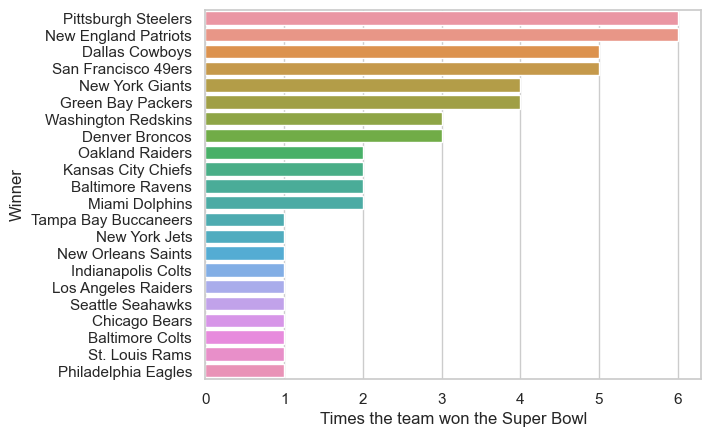

In [10]:
fig, ax = plt.subplots(1, 1)

sns.barplot(data=winners, y='Winner', x='count')

ax.set_xlabel('Times the team won the Super Bowl')

plt.savefig('./plots/2024-02-11_winners.png', bbox_inches='tight', dpi=150)
plt.show()

In [11]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Winner  22 non-null     object
 1   count   22 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 484.0+ bytes


In [12]:
losers = data['Loser'].value_counts().to_frame().reset_index()

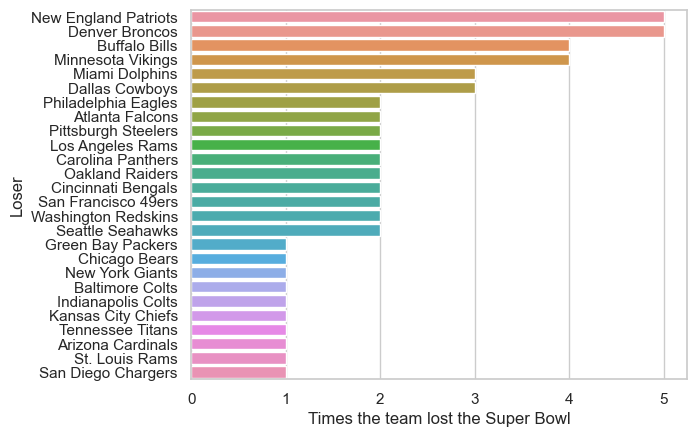

In [13]:
fig, ax = plt.subplots(1, 1)

sns.barplot(data=losers, y='Loser', x='count')

ax.set_xlabel('Times the team lost the Super Bowl')

plt.savefig('./plots/2024-02-11_losers.png', bbox_inches='tight', dpi=150)
plt.show()

In [14]:
losers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Loser   26 non-null     object
 1   count   26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 548.0+ bytes


In [15]:
data['year'] = data['Date'].apply(lambda x: x[:4])
data['year'] = data['year'].astype(int)

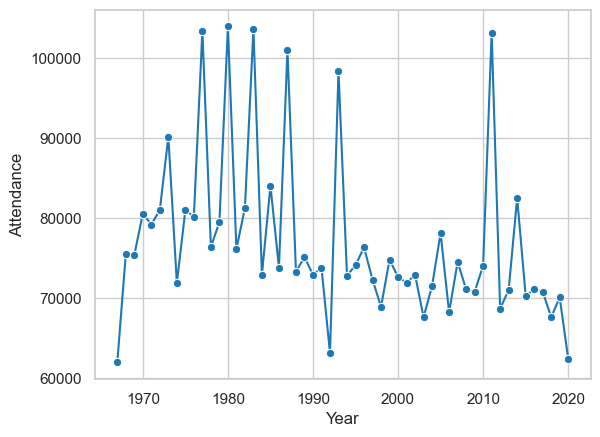

In [16]:
fig, ax = plt.subplots(1, 1)

sns.lineplot(data=data.sort_values('year'), x='year', y='Attendance', marker='o')

ax.set_xlabel('Year')

#ax.set_xticks([1980, 1990, 2000, 2010, 2020])

plt.savefig('./plots/2024-02-11_attendance.png', bbox_inches='tight', dpi=150)


In [17]:
data.sort_values('Attendance')[['Stadium', 'City', 'State', 'year', 'Attendance']]

,Stadium,City,State,year,Attendance
24,Memorial Coliseum,Los Angeles,California,1967,61946
35,Hard Rock Stadium,Miami Gardens,Florida,2020,62417
48,Metrodome,Minneapolis,Minnesota,1992,63130
1,Qualcomm Stadium,San Diego,California,2003,67603
42,U.S. Bank Stadium,Minneapolis,Minnesota,2018,67612
44,Ford Field,Detroit,Michigan,2006,68206
25,Lucas Oil Stadium,Indianapolis,Indiana,2012,68658
15,Qualcomm Stadium,San Diego,California,1998,68912
23,Mercedes-Benz Stadium,Atlanta,Georgia,2019,70081
2,University of Phoenix Stadium,Glendale,Arizona,2015,70288


In [18]:
lats = data['Geo Point 2D'].apply(lambda x: float(x.split(',')[0]))
lons = data['Geo Point 2D'].apply(lambda x: float(x.split(',')[1]))

In [19]:
lldf = pd.DataFrame(dict(lon=lons, lat=lats))
#lldf = lldf.drop_duplicates()
lldf['Point'] = [ sgeom.Point(lldf.iloc[i,0], lldf.iloc[i,1]) for i in range(len(lldf)) ]
lldf.head()

,lon,lat,Point
0,-91.957206,31.048078,POINT (-91.95720618190001 31.0480777894)
1,-119.640544,37.255145,POINT (-119.640543961 37.2551445335)
2,-111.659463,34.295595,POINT (-111.659463463 34.2955950831)
3,-82.502574,28.616928,POINT (-82.5025741003 28.6169283051)
4,-83.451093,32.652469,POINT (-83.4510929921 32.6524688988)


In [20]:
brewcolors = ['#f7f4f9','#e7e1ef','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#91003f']

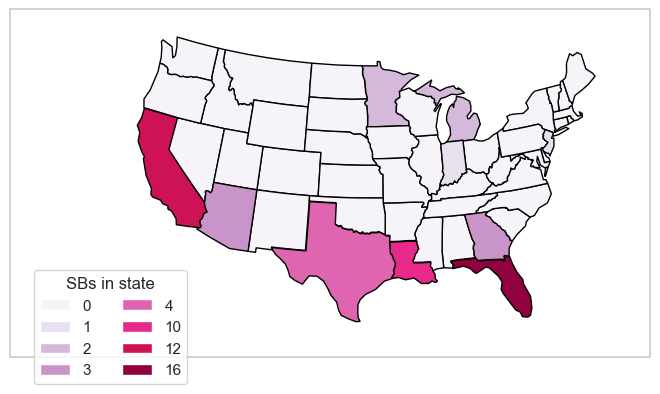

In [21]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),
                      frameon=True)
#ax.patch.set_visible(False)

ax.set_extent([-130, -70, 20, 50])

shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

def colorize_state(geometry):
    facecolor = brewcolors[0]
    
    n = geometry.contains(lldf['Point']).sum()
    
    if n==1:
        facecolor = brewcolors[1]
    elif n==2:
        facecolor = brewcolors[2]
    elif n==3:
        facecolor = brewcolors[3]
    elif n==4:
        facecolor = brewcolors[4]
    elif n==10:
        facecolor = brewcolors[5]
    elif n==12:
        facecolor = brewcolors[6]
    elif n==16:
        facecolor = brewcolors[7]
    
    return {'facecolor': facecolor, 'edgecolor': 'black'}
    

ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

patches = []

for i in range(len(brewcolors)):
    patches.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=brewcolors[i]))
    
labels = [0, 1, 2, 3, 4, 10, 12, 16]

ax.legend(patches, labels,
          title='SBs in state', ncol=2,
          loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)

plt.savefig('./plots/2024-02-11_states.png', bbox_inches='tight', dpi=150)

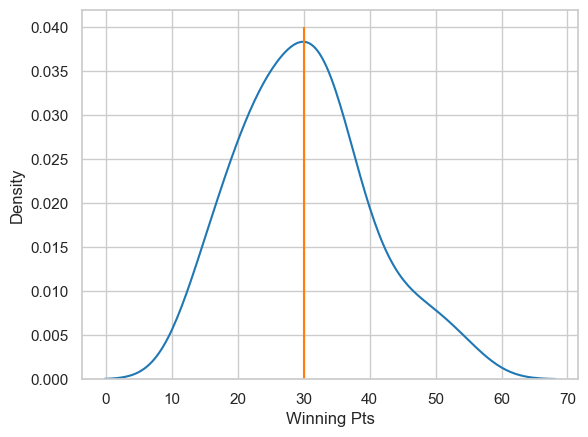

In [22]:
fig, ax = plt.subplots(1, 1)

sns.kdeplot(data['Winning Pts'])

ax.vlines(np.mean(data['Winning Pts']), 0, .04, color='C1')
#ax.vlines(np.median(data['Winning Pts']), 0, .04, color='C2')

plt.savefig('./plots/2024-02-11_pts.png', bbox_inches='tight', dpi=150)